In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
# Load the dataset
file_path = '../Data_Source/gym_members.csv'
gym_members_data = pd.read_csv(file_path)

In [7]:
# Relevant columns for the project
relevant_columns = [
    'Experience_Level', 'Workout_Frequency (days/week)', 'Session_Duration (hours)',
    'Calories_Burned', 'Fat_Percentage', 'Max_BPM', 'Resting_BPM', 'Age', 'Gender'
]

In [9]:
# Separate features and target variable
X = gym_members_data[relevant_columns].drop(columns=['Experience_Level'])
y = gym_members_data['Experience_Level']

In [11]:
# One-hot encoding for 'Gender'
column_transformer = ColumnTransformer(
    transformers=[('gender_encoder', OneHotEncoder(drop='first'), ['Gender'])],
    remainder='passthrough'
)
X_transformed = column_transformer.fit_transform(X)


In [23]:
# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)
X_scaled

array([[ 0.95084677,  0.74329509,  1.26459826, ...,  0.01008143,
        -0.30355488,  1.42234256],
       [-1.05169416,  0.74329509,  0.12709832, ..., -0.07672592,
         0.51574859,  0.60096485],
       [-1.05169416,  0.74329509, -0.42706833, ..., -1.11841414,
        -1.12285836, -0.54896396],
       ...,
       [-1.05169416,  1.83909224,  1.35209826, ...,  1.22538435,
        -1.25940893,  1.66875588],
       [ 0.95084677, -0.35250206, -0.45623499, ...,  1.57261375,
        -0.03045373, -0.54896396],
       [ 0.95084677, -1.44829922, -1.47706828, ..., -1.20522149,
         0.51574859,  0.60096485]])

In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# Train initial Random Forest model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Feature importance
feature_names = column_transformer.get_feature_names_out()
feature_importances = rf_classifier.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = feature_names[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

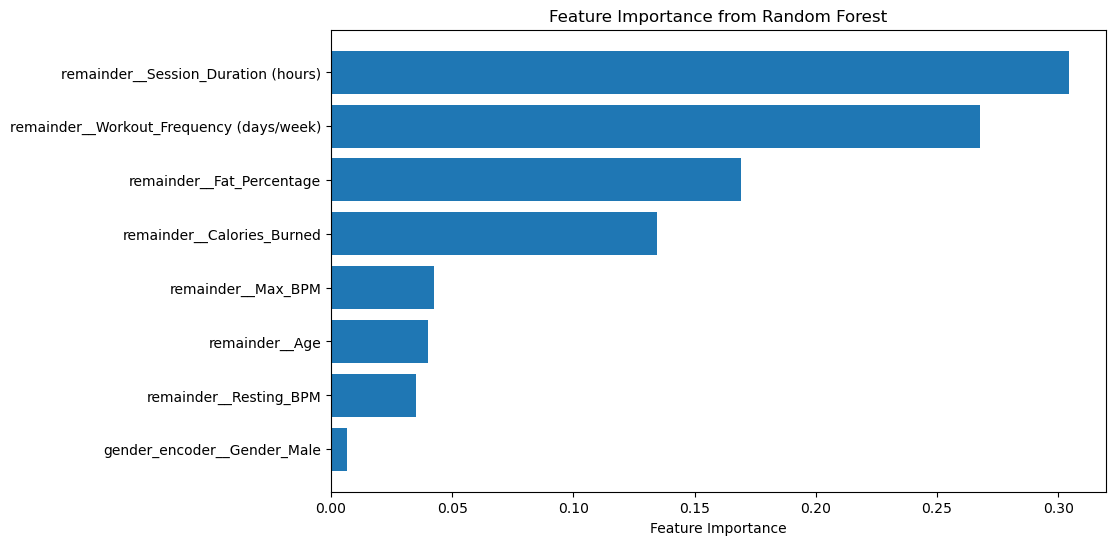

In [16]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, align='center')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [18]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [19]:
# Predict using the tuned model
y_pred_tuned = best_model.predict(X_test)

In [20]:
# Confusion matrix for the tuned model
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)

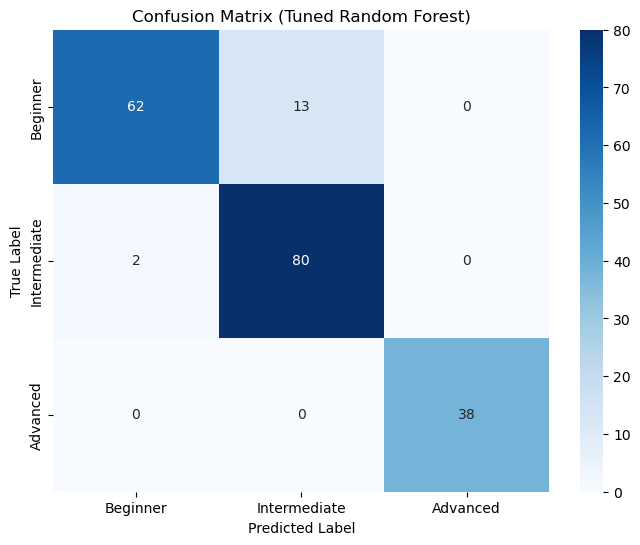

In [21]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Beginner', 'Intermediate', 'Advanced'],
            yticklabels=['Beginner', 'Intermediate', 'Advanced'])
plt.title('Confusion Matrix (Tuned Random Forest)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [22]:
# Classification report
print("Best Hyperparameters:", best_params)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned, target_names=['Beginner', 'Intermediate', 'Advanced']))

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}

Classification Report:
              precision    recall  f1-score   support

    Beginner       0.97      0.83      0.89        75
Intermediate       0.86      0.98      0.91        82
    Advanced       1.00      1.00      1.00        38

    accuracy                           0.92       195
   macro avg       0.94      0.93      0.94       195
weighted avg       0.93      0.92      0.92       195



In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import classification_report

In [43]:
import numpy as np
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_test:", np.unique(y_test))

Unique labels in y_train: [1 2 3]
Unique labels in y_test: [1 2 3]


In [44]:
# Step 1: Fix label encoding (if necessary)
y_train = y_train - y_train.min()
y_test = y_test - y_test.min()

In [45]:
# Verify the number of classes
n_classes = len(np.unique(y_train))
n_classes

3

In [46]:
# Step 1: Build the Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer + 1st hidden layer
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # 2nd hidden layer
    Dropout(0.2),
    Dense(32, activation='relu'),  # 3rd hidden layer
    Dense(len(y.unique()), activation='softmax')  # Output layer with softmax for multiclass classification
])

/Users/gerardoochoa/anaconda3/envs/pandasplayground/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# Step 2: Compile the Model
nn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [48]:
# Step 3: Train the Model
history = nn_model.fit(X_train, y_train, 
                       validation_data=(X_test, y_test), 
                       epochs=50, 
                       batch_size=32, 
                       verbose=1)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4857 - loss: 1.0128 - val_accuracy: 0.7641 - val_loss: 0.6941
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7593 - loss: 0.6639 - val_accuracy: 0.8513 - val_loss: 0.4091
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8563 - loss: 0.3887 - val_accuracy: 0.8564 - val_loss: 0.2792
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8542 - loss: 0.3131 - val_accuracy: 0.8872 - val_loss: 0.2315
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.8343 - loss: 0.2943 - val_accuracy: 0.8974 - val_loss: 0.2148
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 939us/step - accuracy: 0.8687 - loss: 0.2655 - val_accuracy: 0.8974 - val_loss: 0.2219
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8799 - loss: 0.2428 - val_accuracy: 0.9026 - val_loss: 0.2039
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.8665 - loss: 0.2567 - val_accuracy: 0.9026 - val

In [49]:
# Step 5: Evaluate the Model
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)

In [50]:
# Predictions
y_pred_nn = nn_model.predict(X_test)
y_pred_nn_classes = tf.argmax(y_pred_nn, axis=1).numpy()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [51]:
# Classification Report
nn_class_report = classification_report(y_test, y_pred_nn_classes)

In [52]:
print(f"Neural Network Accuracy: {nn_accuracy * 100:.2f}%")
print("\nClassification Report:\n", nn_class_report)

Neural Network Accuracy: 89.23%

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86        75
           1       0.88      0.87      0.87        82
           2       1.00      1.00      1.00        38

    accuracy                           0.89       195
   macro avg       0.91      0.91      0.91       195
weighted avg       0.89      0.89      0.89       195



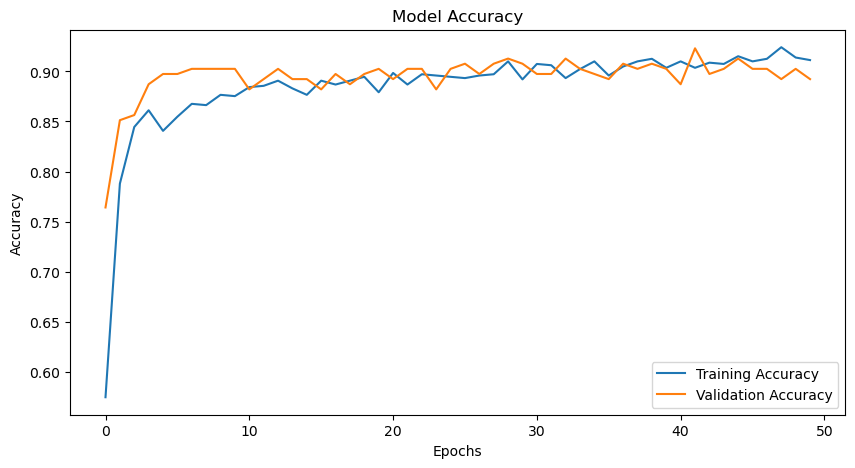

In [53]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

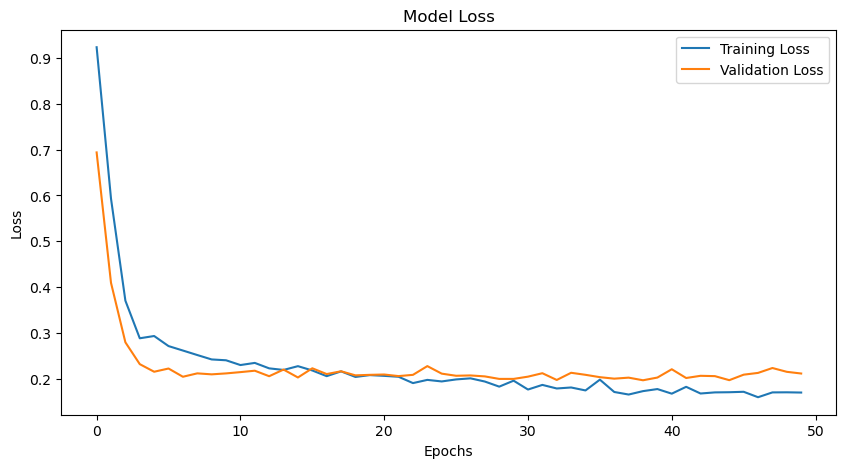

In [54]:
# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Save the model to a file
nn_model.save('workout_type_classifier.h5')
print("Model saved as 'workout_type_classifier.h5'")

Model saved as 'workout_type_classifier.h5'


Class Distribution in Training Data:
Experience_Level
1    324
0    301
2    153
Name: count, dtype: int64


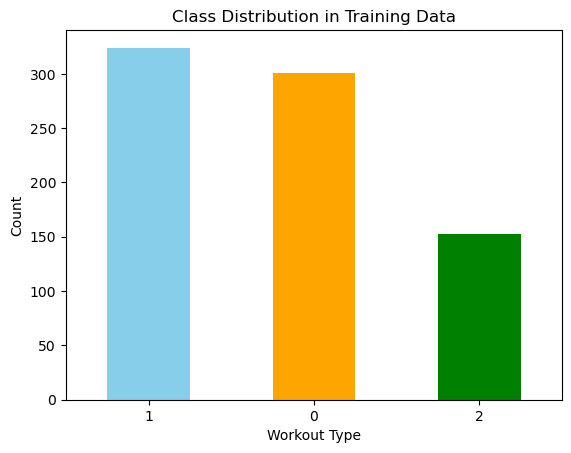

In [57]:
# Check class distribution in y_train
print("Class Distribution in Training Data:")
print(pd.Series(y_train).value_counts())

# Optional: Visualize the class distribution
pd.Series(y_train).value_counts().plot(kind='bar', color=['skyblue', 'orange', 'green', 'red'])
plt.title('Class Distribution in Training Data')
plt.xlabel('Workout Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()